<a href="https://colab.research.google.com/github/petitmj/CapstoneProject-LowResourceFraudDetection/blob/main/CAPSTONE_PROJECT_Low_Resource_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAPSTONE PROJECT - Low-Resource Fraud Detection

## 1.  Choose a Topic

My topic is **Low-resource Fraud Detection**

Introduction

Visa and Mastercard share a goal of Digital Transformation in Kenya.
For this goal to be achieved, users must be assured of secure transactions.

A Visa study reveals that 71% of Kenyan consumers have experienced digital fraud, marking the highest rate in Sub-Saharan Africa.

Mastercard projects that financial losses from credit card fraud alone will reach USD 43 billion globally by 2026.

Furthermore, these fraud cases are spreading to rural areas which are low-resource areas.
In rural areas, power and internet are unreliable. This means that financial data generation in these areas is not consistent.



Problem Statement

Objective: The objective of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions from **limited data**. The goal is to maximize the identification of fraudulent cases (recall) while minimizing incorrect classifications of legitimate transactions as fraudulent (precision), thereby preventing financial loss for cardholders and new markets.

Business Context

According to studies from Visa and Mastercard, credit card fraud results in billions of dollars in losses annually. Early and accurate detection of fraudulent transactions is crucial for financial institutions to minimize losses and protect customers.

-----

2.  Select a dataset

I selected the MLG-ULB Credit Card Fraud Detection Dataset (Kaggle Rating: 8+). The nature of the data is based on the industry standard.
The dataset has two major limitations.
First, most of the features are anonymized through Principle Component Analysis(PCA). Second, there's only two days' worth of data.

First, we import our dependencies.

We need pandas and numpy for data processing. Matplotlib and Seaborn for plotting. Scikit learn is for preprocessing, evaluation, and modelling. Imblearn is for oversampling. Kagglehub gives us our dataset.

In [ ]:
!pip install imblearn
!pip install kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from imblearn.over_sampling import SMOTE
import kagglehub
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
dataset_path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Read the creditcard.csv file into a pandas DataFrame
df = pd.read_csv(f'{dataset_path}/creditcard.csv')

print("Data loaded successfully.")

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Data loaded successfully.


-----

3.  Data Exploration and Preprocessing

Now that our dataset is loaded successfully, let's have a look at it.

In [ ]:
# Determining the shape of the dataset
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Let's check the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Let's check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

The dataset has 284807 rows and 31 columns

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.

From the data above, we see that all the features are float values except one, which is an integer.

In [ ]:
print("Summary statistics of the dataset:")
print(df.describe())

# Checking for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Checking for null values
print(f"\nNumber of null values in each column:\n{df.isnull().sum().sum()}")
# This is a bit more direct than listing each column if you're just checking for existence

# Check for class distribution
print(f"\nClass distribution:\n{df['Class'].value_counts()}")

Summary statistics of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    

Since we have duplicates and null values, we'll have to drop them.

In [ ]:
# Removing duplicates
initial_rows = df.shape[0]
df = df.drop_duplicates().copy()
rows_removed = initial_rows - df.shape[0]
print(f"Number of duplicate rows removed: {rows_removed}")
print(f"The dataset now has {df.shape[0]} rows and {df.shape[1]} columns")

Number of duplicate rows removed: 1081
The dataset now has 283726 rows and 31 columns


All values in the dataset are numerical and there are no null values. The only data cleaning step we had to take was removing duplicates and dealing with the null. Since all the columns are numerical, we don't need to encode any categorical variables. Given that all columns are float and int, we don't need to convert any data types.

However, the class imbalance is high.

4.  Exploratory Data Analysis

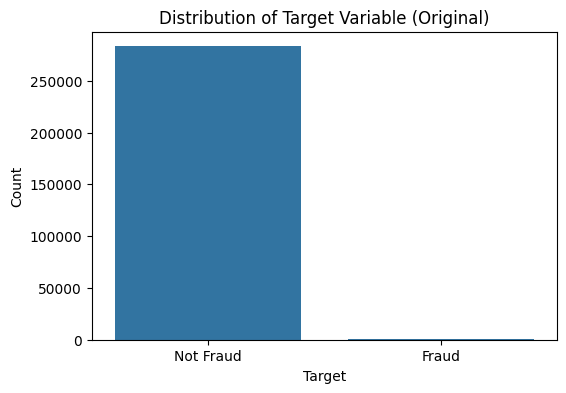

In [ ]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Original)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

The plots above confirm our classes are highly imbalanced, with a severe lack of fraudulent cases. This imbalance is why we need to use a technique like SMOTE. It also confirms that our target is either 0 or 1, representing "Not Fraudulent" or "Fraudulent".

However, SMOTE can only be applied to the training data after the train-test split. This helps prevent data leakage and overly optimistic model results

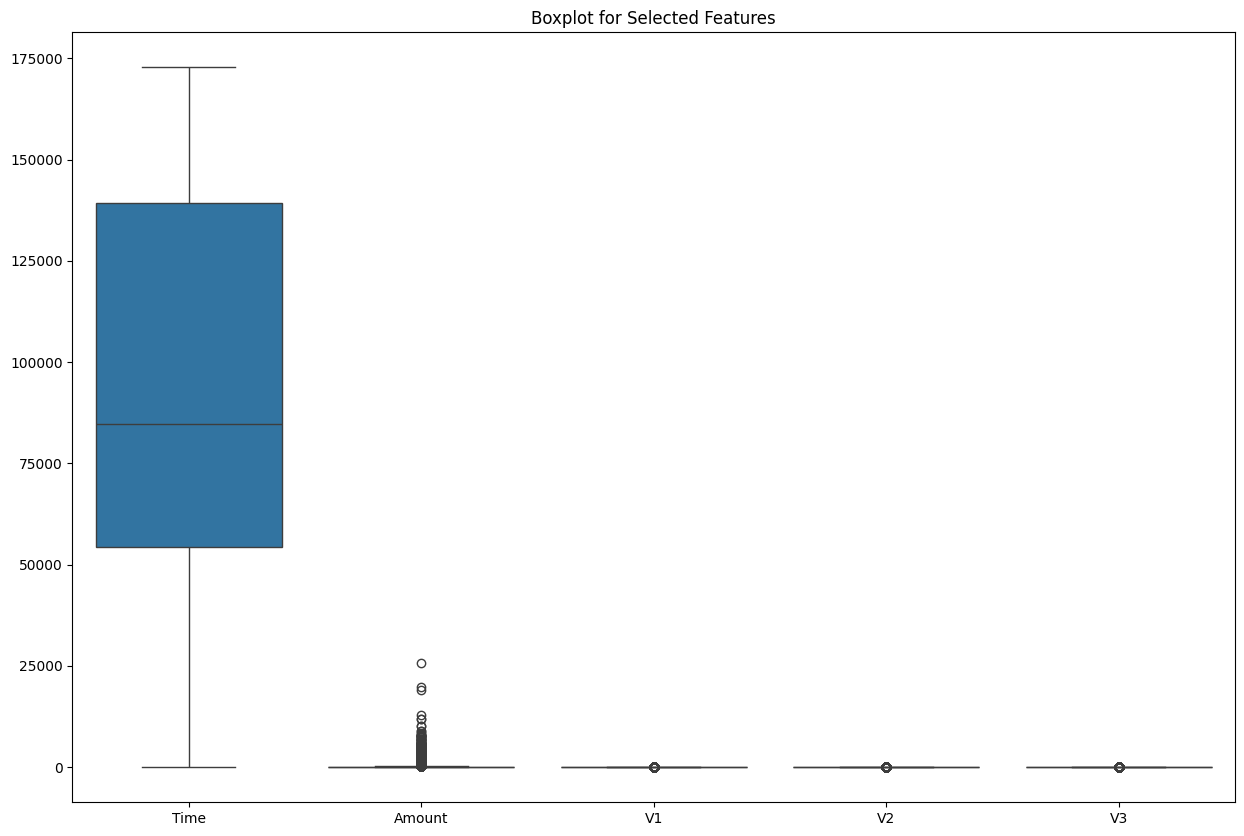

In [ ]:
# Checking for outliers using boxplots
plt.figure(figsize=(15, 10))
# We'll focus on a few key features since plotting all 31 columns is hard to read
cols_to_plot = ['Time', 'Amount', 'V1', 'V2', 'V3']
sns.boxplot(data=df[cols_to_plot])
plt.title('Boxplot for Selected Features')
plt.show()

The boxplot reveals that the **Time** and **Amount** features have a wide range of values and significant outliers. This is expected in financial data. The wide variation in **Time** indicates that transactions occur over a substantial period. The large outlier amounts could be legitimate, high-value purchases or potential fraud. The PCA-transformed features (V1-V28) are uniformly centered around zero, making visual outlier detection difficult, which is why we will rely more on our feature engineering and the model itself to find patterns.

Because this is financial data, the features V1-V28 are PCA-transformed and anonymized. This means we won't be able to draw business insights from them directly. They are also uniformly clustered around zero, indicating that they've been standardized. We'll need to find any correlation between the features V1-V28 and the target variable to see if any are more predictive of fraud. We will use a correlation heatmap.

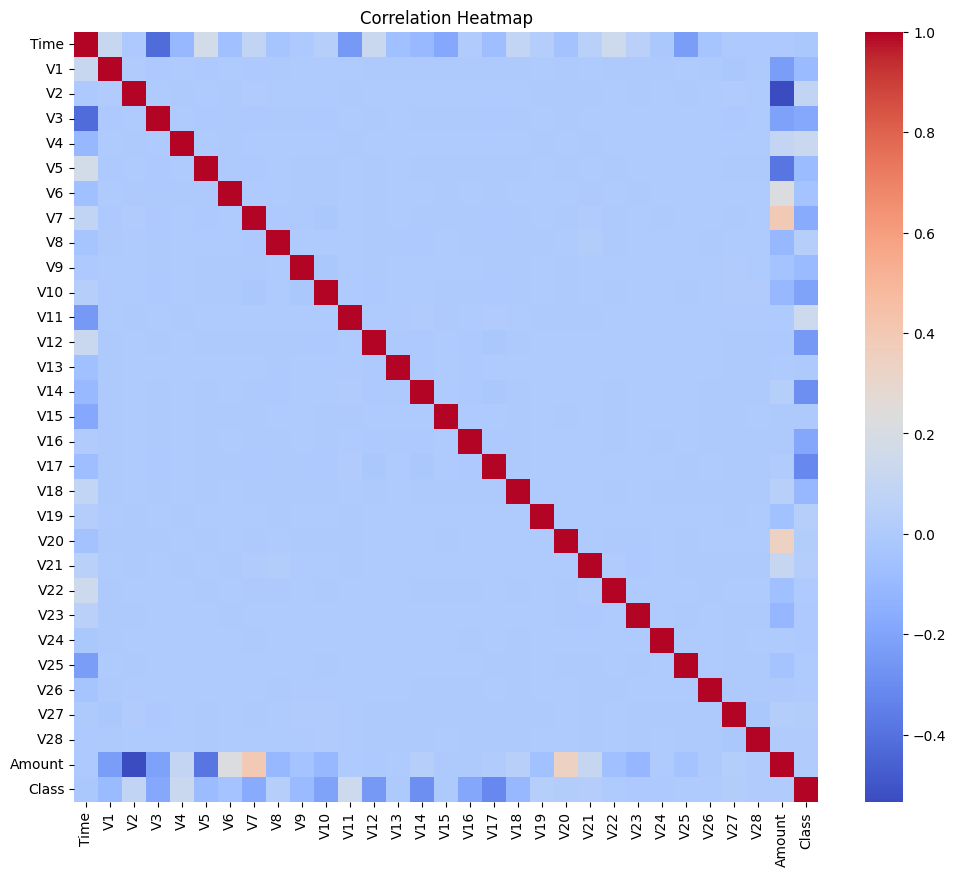

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Stronger correlations between features are indicated by hues tending toward red, while weaker correlations have hues tending toward blue. Since the map is mostly blue, most features have a weak correlation with one another. The red diagonal at the center indicates that each feature is perfectly correlated with itself. At the bottom, we have our target variable, **Class**. We can see that features like **'V17'**, **'V14'**, and **'V12'** have a strong negative correlation with fraud, while **'V4'** and **'V11'** have a strong positive correlation. This means that certain combinations of these anonymized features are highly predictive of fraud.

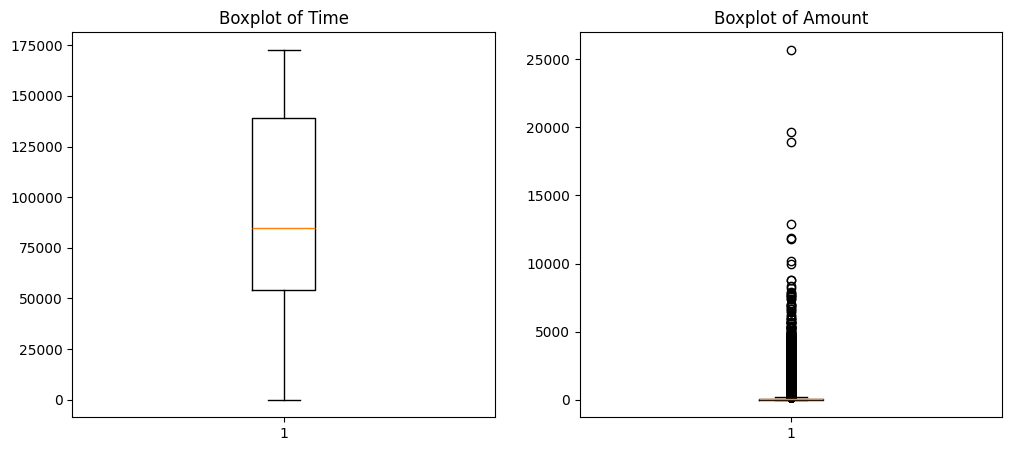

In [ ]:
# Exploring our outlier variables of Time and Amount further using boxplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Time'])
plt.title('Boxplot of Time')
plt.subplot(1, 2, 2)
plt.boxplot(df['Amount'])
plt.title('Boxplot of Amount')
plt.show()

-----

5.  Feature Engineering

We have isolated Time and Amount features for closer inspection. We'll conduct feature engineering on the Time feature. The time variable is in seconds. We have to convert it to a more intuitive format like seconds, minutes, hours, and days to gain deeper insights.

In [ ]:
# Transforming seconds into actionable features
df['day'] = df['Time'] // 86400  # 86400 seconds in a day
df['hour'] = (df['Time'] / 3600) % 24
df['minute'] = (df['Time'] / 60) % 60
df['second'] = df['Time'] % 60

# Let's convert our new features to integers for clean representation
df['day'] = df['day'].astype(int)
df['hour'] = df['hour'].astype(int)
df['minute'] = df['minute'].astype(int)
df['second'] = df['second'].astype(int)

# Let's preview the new features
print("New time-based features:")
print(df[['Time', 'day', 'hour', 'minute', 'second']].tail())

# Unifying our new features into a single timestamp feature
df['timestamp'] = pd.to_timedelta(df['Time'], unit='s') + pd.Timestamp('2013-09-01')
print("\nTimestamp feature:")
print(df[['Time', 'timestamp']].tail())

New time-based features:
            Time  day  hour  minute  second
284802  172786.0    1    23      59      46
284803  172787.0    1    23      59      47
284804  172788.0    1    23      59      48
284805  172788.0    1    23      59      48
284806  172792.0    1    23      59      52

Timestamp feature:
            Time           timestamp
284802  172786.0 2013-09-02 23:59:46
284803  172787.0 2013-09-02 23:59:47
284804  172788.0 2013-09-02 23:59:48
284805  172788.0 2013-09-02 23:59:48
284806  172792.0 2013-09-02 23:59:52


We have gotten 4 more features from out time feature.

In [ ]:
# Additional time-based features
# `is_night_transaction` flags transactions that occur between 10 PM and 6 AM, a time when fraudulent activity is common.
df['is_night_transaction'] = ((df['hour'] < 6) | (df['hour'] > 22)).astype(int)
# `is_business_hours` checks for transactions during typical 9 AM to 5 PM business hours.
df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(int)
# Convert to integer to ensure they are treated as numerical features by the model.

print("Additional time-based features:")
print(df[['Time', 'is_night_transaction', 'is_business_hours']].head())

Additional time-based features:
   Time  is_night_transaction  is_business_hours
0   0.0                     1                  0
1   0.0                     1                  0
2   1.0                     1                  0
3   1.0                     1                  0
4   2.0                     1                  0


Breaking down the time variable reveals that the transactions take place over two days, day 0 and day 1. The additional features help us determine whether more fraud transactions occur during business hours or not. These 2 more features increase our total features to 6. They help us segment the transactions to specific periods. The time of day a transaction occurs has an impact on whether the transaction is fraudulent or not.

In [ ]:
# Amount-based feature engineering
# `amount_log`: We use the natural logarithm with `log1p` to handle the heavy right-skew of the Amount variable.
# This normalization can improve model performance.

df['amount_log'] = np.log1p(df['Amount'])

# `amount_zscore`: This feature tells us how far removed a transaction is from the norm.
df['amount_zscore'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# `amount_percentile`: This ranks our transaction.
df['amount_percentile'] = df['Amount'].rank(pct=True)

# `is_high_amount`: This simply asks if a transaction is in the top 5% of transactions.
df['is_high_amount'] = (df['Amount'] > df['Amount'].quantile(0.95)).astype(int)
# Convert to integer

# `amount_category`: This creates categories based on the amount.
df['amount_category'] = pd.cut(df['Amount'], bins=[0, 50, 200, 1000, np.inf], labels=['micro', 'small', 'medium', 'large'], include_lowest=True)

# Preview the new features
print("Amount-based engineered features:")
print(df[['Amount', 'amount_log', 'amount_zscore', 'amount_percentile', 'is_high_amount', 'amount_category']].head())

Amount-based engineered features:
   Amount  amount_log  amount_zscore  amount_percentile  is_high_amount  \
0  149.62    5.014760       0.244199           0.859116               0   
1    2.69    1.305626      -0.342583           0.185131               0   
2  378.66    5.939276       1.158898           0.952038               1   
3  123.50    4.824306       0.139886           0.831998               0   
4   69.99    4.262539      -0.073813           0.730608               0   

  amount_category  
0           small  
1           micro  
2          medium  
3           small  
4           small  


The new Amount-based engineered features capitalize on the statistical exploration of the Amount feature to generate new features.

`amount_log`: We use the natural logarithm with `log1p` to neutralize the heavy right-skew of the Amount variable. It can improve model performance.

`amount_zscore`: This feature measures how many standard deviations a transaction's amount is from the mean amount in the entire dataset. It helps a model identify unusually large or small transactions.

`amount_percentile`: This checks where a transaction stands in the overall distribution of all amounts. For example, an amount at the 99th percentile is larger than 99% of all other transactions.

`is_high_amount`: This is a simple binary flag that marks transactions in the top 5% of amounts. It is commonly used to flag suspicious transactions.

`amount_category`: This categorizes amounts into portions, which can help a tree-based model like RandomForest learn patterns associated with specific spending tiers.

In summary our new features normalize the skew, checked how far removed a transaction is from the norm, ranks our transaction, and creates different tiers for our amounts.

In [ ]:
# Create magnitude for our anonymized features
# `v_features_magnitude`: Can capture the overal deviation of the PCA-transformed features from the origin, which might be a good indicator of fraud.
v_features = [f'V{i}' for i in range(1, 29)]
df['v_features_magnitude'] = np.sqrt((df[v_features] ** 2).sum(axis=1))
df['v_features_mean'] = df[v_features].mean(axis=1)
df['v_features_std'] = df[v_features].std(axis=1)
print("Magnitude features for V1-V28:")
print(df[['v_features_magnitude', 'v_features_mean', 'v_features_std']].head())

Magnitude features for V1-V28:
   v_features_magnitude  v_features_mean  v_features_std
0              3.911559         0.110063        0.744389
1              2.674524         0.158562        0.488729
2              6.080512         0.038975        1.169522
3              4.284356        -0.086057        0.819854
4              3.565131         0.192097        0.657631


Before we proceed, we need to be able to determine the impact that our anonymized features will have on our model. We accomplished this by enginnering 3 new features based on the magnitude, mean and magnitude of the anonymized features.

We can now use our new features for other visualizations and modeling to gain better insight.


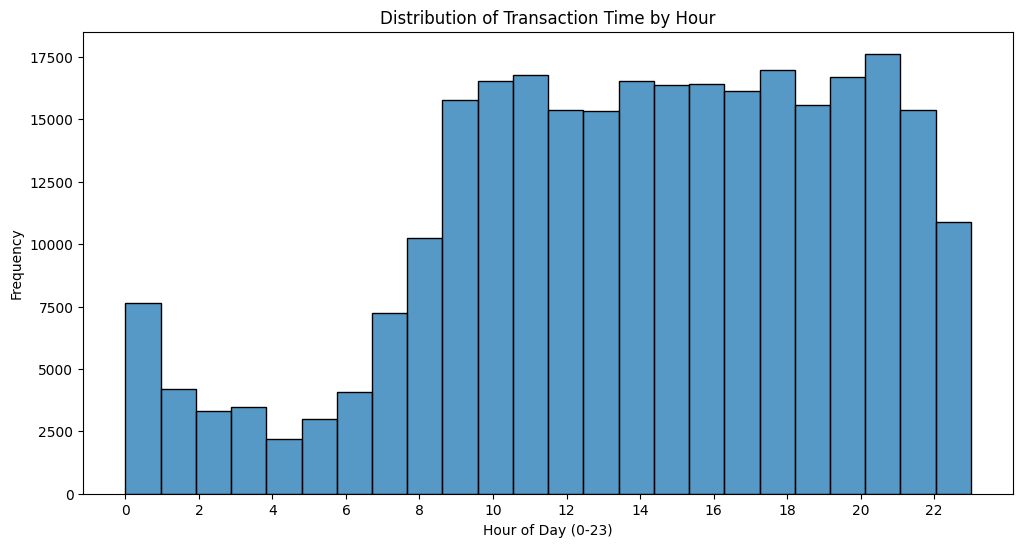

In [ ]:
# Plot the distribution of the 'Time' feature
plt.figure(figsize=(12, 6))
# We'll use our new 'hour' feature for a cleaner plot
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Distribution of Transaction Time by Hour')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 24, 2))
plt.show()

From the graph, we see that the highest volume of transactions was conducted during the day. The least volumes were around midnight and early morning, which makes sense.

Now let's scale our features. We've already created the log-transformed amount feature. The V1-V28 features cannot be scaled because they have already been PCA-transformed and standardized, which is why they are centered around zero. Scaling helps us normalize the different features so they are on a similar scale, which is crucial for some models like Logistic Regression.

In [ ]:
# Scaling Time and Amount features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scaling Time
# MinMax scaler brings all values to a 0-1 range.
scaler_time = MinMaxScaler()
df['Time_scaled'] = scaler_time.fit_transform(df[['Time']])

# Scaling Amount
# The log transform handles the extreme right skew of the Amount feature.
# The StandardScaler then normalizes this transformed distribution, preserving the relationship between amounts while centering them.
df['Amount_log'] = np.log1p(df['Amount'])  # Using log1p to handle Amount=0
scaler_amount = StandardScaler()
df['Amount_log_scaled'] = scaler_amount.fit_transform(df[['Amount_log']])

# Let's preview the new scaled features
print("Scaled Time and Amount features:")
print(df[['Time', 'Time_scaled', 'Amount', 'Amount_log_scaled']].head())

Scaled Time and Amount features:
   Time  Time_scaled  Amount  Amount_log_scaled
0   0.0     0.000000  149.62           1.123062
1   0.0     0.000000    2.69          -1.115298
2   1.0     0.000006  378.66           1.680981
3   1.0     0.000006  123.50           1.008128
4   2.0     0.000012   69.99           0.669117


The log transform handles the right skew of the Amount feature. The StandardScaler normalizes the transformed distribution while preserving the relationship between amounts. Let's plot with our scaled features.

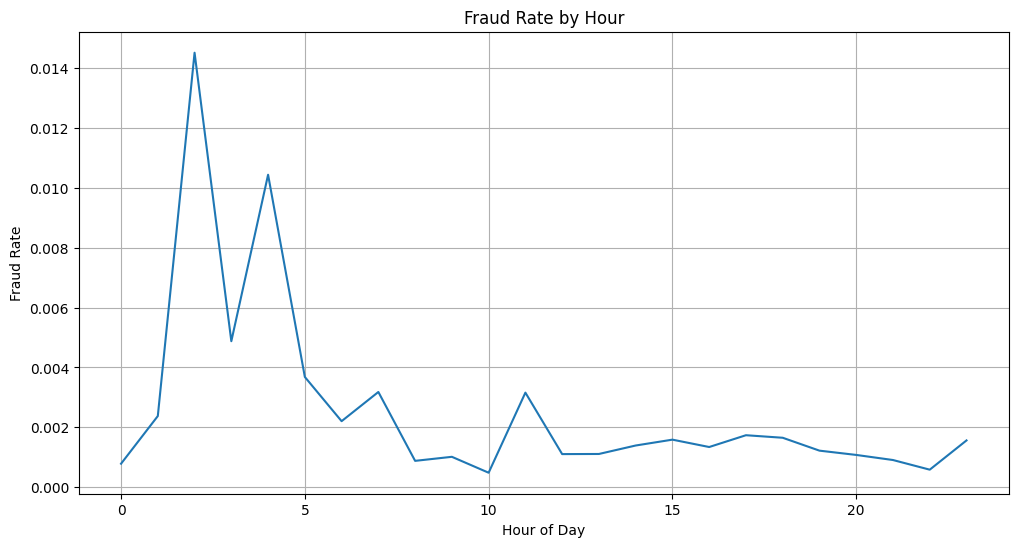

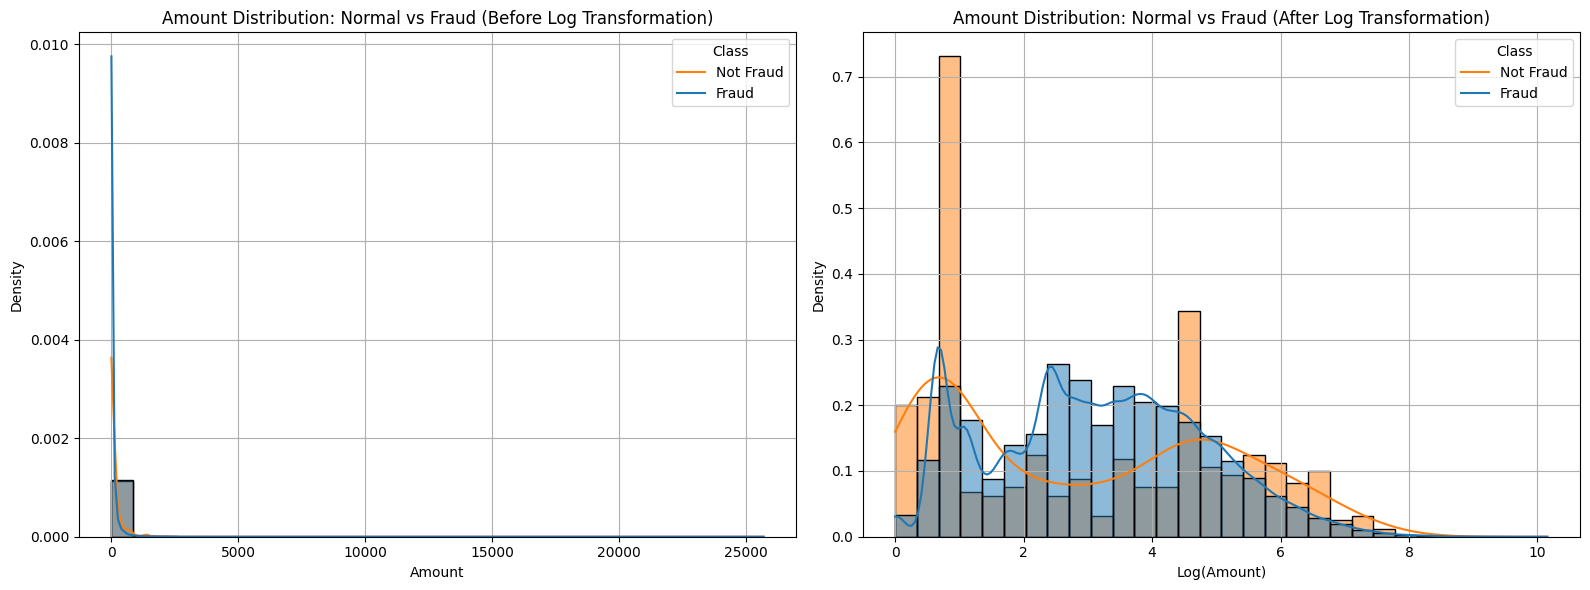

In [ ]:
# `Fraud Rate by Hour` line plot
fraud_by_hour = df.groupby('hour')['Class'].agg(['count', 'sum', 'mean']).rename(columns={'mean': 'fraud_rate'})
plt.figure(figsize=(12, 6))
plt.plot(fraud_by_hour.index, fraud_by_hour['fraud_rate'])
plt.title('Fraud Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()

# `Amount Distribution` histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before Log Transformation
sns.histplot(data=df, x='Amount', hue='Class', bins=30, kde=True, stat="density", common_norm=False, ax=axes[0])
axes[0].set_title('Amount Distribution: Normal vs Fraud (Before Log Transformation)')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Density')
axes[0].legend(title='Class', labels=['Not Fraud', 'Fraud'])
axes[0].grid(True)

# After Log Transformation
sns.histplot(data=df, x='Amount_log', hue='Class', bins=30, kde=True, stat="density", common_norm=False, ax=axes[1])
axes[1].set_title('Amount Distribution: Normal vs Fraud (After Log Transformation)')
axes[1].set_xlabel('Log(Amount)')
axes[1].set_ylabel('Density')
axes[1].legend(title='Class', labels=['Not Fraud', 'Fraud'])
axes[1].grid(True)

plt.tight_layout()
plt.show()

-----

6.  Model Selection and Justification

Why RandomForest?
I chose **RandomForest** as our primary model because:

  * **Handles Complex Feature Interactions:** Fraud patterns are often not simple, linear relationships. RandomForest is an ensemble of decision trees that can capture complex, non-linear interactions between features (e.g., a transaction is fraudulent only if it's a high amount *and* occurs at night).
  * **Robust to Outliers:** The model's decision-making process is not significantly affected by extreme values like the outliers we saw in the Amount and Time features.
  * **Provides Feature Importance:** It can tell us which features contributed most to the model's predictions, giving us valuable insights into what drives fraudulent activity.

Baseline Comparison:
We'll also train a **Logistic Regression** model as a baseline. As a linear model, it will show us how much improvement we get by using a more complex, non-linear model like RandomForest, especially given the complex nature of fraud detection.

In [ ]:
# One-hot encode 'amount_category'
amount_category_dummies = pd.get_dummies(df['amount_category'], prefix='amount_category', dummy_na=False)
df = pd.concat([df, amount_category_dummies], axis=1)

# Create interaction features and convert to integer
df['night_high_amount'] = (df['is_night_transaction'] & df['is_high_amount']).astype(int)
df['business_hours_amount'] = (df['is_business_hours'] & df['is_high_amount']).astype(int)

# Prepare our feature set WITH all engineered features
feature_columns = (
    v_features +
    ['Time_scaled', 'Amount_log_scaled'] +
    ['hour', 'is_night_transaction', 'is_business_hours'] +
    ['amount_percentile', 'amount_zscore', 'is_high_amount'] +
    list(amount_category_dummies.columns) +
    ['night_high_amount', 'business_hours_amount'] +
    ['v_features_magnitude', 'v_features_mean', 'v_features_std']
)

# Prepare X and y using ALL our engineered features
X = df[feature_columns]
y = df['Class']

print(f"Using {len(feature_columns)} features including all our engineered ones")
print("Feature columns:", feature_columns[:10], "...")  # Show first 10 features

Using 45 features including all our engineered ones
Feature columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'] ...


We gathered all the relevant features we've engineered and the original V-features, preparing them for the train-test split and model training.

The `amount_category` was created with bins like 'micro', 'small'. Now we convert them into numerical format using one-hot encoding. This creates new binary columns (e.g., amount_category_micro, amount_category_small), where a 1 in a column indicates that the transaction amount falls into that category. This is necessary because most machine learning models require numerical input.
Create Interaction Features: It creates two new interaction features:
night_high_amount: This feature is 1 if a transaction occurs at night and is a high amount (in the top 5%), and 0 otherwise.

`business_hours_amount` is 1 if a transaction occurs during business hours and is a high amount, and 0 otherwise. These features capture potential interactions between the time of the transaction and its amount, which might be predictive of fraud.

`Feature Columns` creates a list feature_columns that includes all the features we will use for training the models. This list combines:
The original PCA-transformed V-features (V1-V28).
The scaled Time_scaled and Amount_log_scaled features.
The engineered time-based features (hour, is_night_transaction, is_business_hours).
The engineered amount-based features (amount_percentile, amount_zscore, is_high_amount).
The new one-hot encoded amount_category columns.
The two interaction features (night_high_amount, business_hours_amount).
The magnitude features for V1-V28 (v_features_magnitude, v_features_mean, v_features_std).

In [ ]:
# Drop rows where 'Class' is NaN before splitting
df_cleaned = df.dropna(subset=['Class']).copy()
X = df_cleaned[feature_columns]
y = df_cleaned['Class']


# Split before applying SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("\nOriginal training class distribution:")
print(y_train.value_counts())

Training set size: (226980, 45)
Test set size: (56746, 45)

Original training class distribution:
Class
0    226602
1       378
Name: count, dtype: int64


We did a bit of cleaning after engineering our new features. Then we conducted the train-test split before applying SMOTE to balance out target.

Training class distribution after SMOTE:
{np.int64(0): np.int64(226602), np.int64(1): np.int64(226602)}


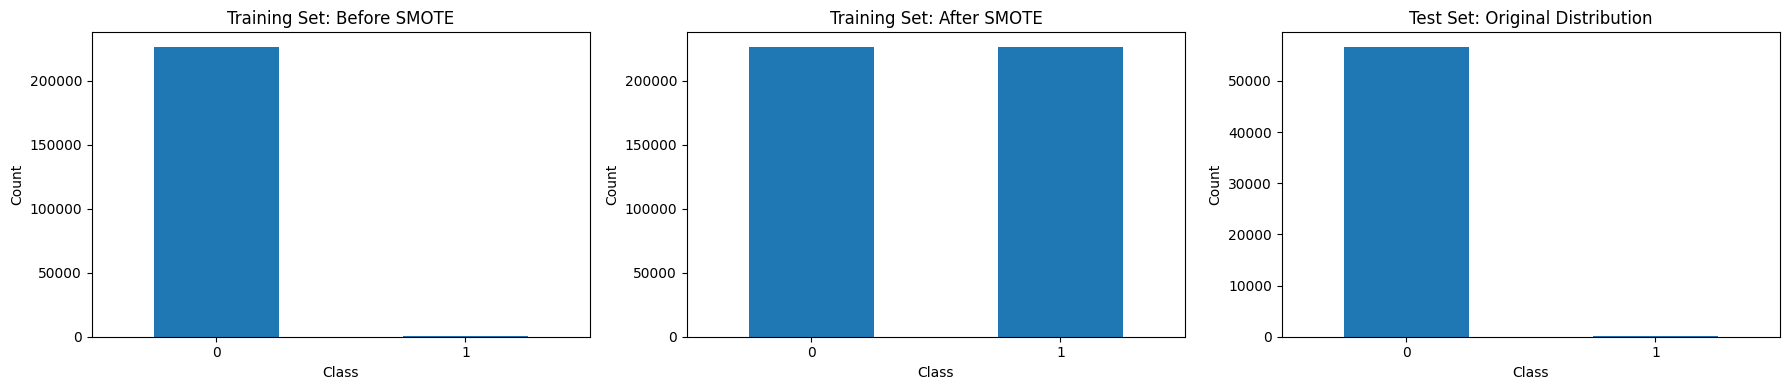

In [ ]:
# Apply SMOTE only to training data to prevent data leakage
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Training class distribution after SMOTE:")
unique, counts = np.unique(y_train_balanced, return_counts=True)
print(dict(zip(unique, counts)))

# Visualization of class balance
fig, axes = plt.subplots(1, 3, figsize=(18, 4)) # Adjusted for better layout

# Plot 1: Before SMOTE
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Set: Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)

# Plot 2: After SMOTE
pd.Series(y_train_balanced).value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Training Set: After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=0)

# Plot 3: Test Set Distribution
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Set: Original Distribution')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

We performed visualization to see the effectiveness of SMOTE application.

-----

7.  Model Training and Evaluation

<!-- end list -->

In [ ]:
# Train RandomForest baseline
print("Training RandomForest model...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_balanced, y_train_balanced)

# Train Logistic Regression baseline for comparison
# Note: For logistic regression, it's often a good idea to scale all features
# Let's add a scaler for the V-features to be fair to the LR model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Training Logistic Regression baseline...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train_balanced)

# Predictions for both models
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

lr_pred = lr.predict(X_test_scaled)
lr_proba = lr.predict_proba(X_test_scaled)[:, 1]

Training RandomForest model...
Training Logistic Regression baseline...


First we trained with Random Forest model then Logistic regression.

In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f'\n=== {model_name} Results ===')
    print('Classification Report:')
    print(classification_report(y_true, y_pred))

    roc = roc_auc_score(y_true, y_proba)
    # The Precision-Recall AUC is a more reliable metric for imbalanced datasets.
    precision, recall, _ = precision_recall_curve(y_true, y_proba)
    pr_auc = auc(recall, precision)

    print(f'ROC AUC: {roc:.4f}')
    print(f'PR AUC: {pr_auc:.4f}')

    print('Confusion Matrix:')
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    print(f"True Negatives: {cm[0,0]}, False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}, True Positives: {cm[1,1]}")

    return {
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred),
        'roc_auc': roc,
        'pr_auc': pr_auc
    }

# Evaluate both models
rf_results = evaluate_model(y_test, rf_pred, rf_proba, "RandomForest")
lr_results = evaluate_model(y_test, lr_pred, lr_proba, "Logistic Regression")


=== RandomForest Results ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.94      0.76      0.84        95

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9534
PR AUC: 0.8208
Confusion Matrix:
[[56646     5]
 [   23    72]]
True Negatives: 56646, False Positives: 5
False Negatives: 23, True Positives: 72

=== Logistic Regression Results ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.08      0.87      0.15        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.57     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC: 0.9459
PR AUC: 0.7373
Confusion Matrix:
[[55701   950]
 [   12

After our models are trained we evaluated them. From the report we were able to determine the true negatives, false positives, false negatives, and true positives using the confusion matrix. We also used precision and recall to further tell us the degree of correctness.


=== Feature Importance Analysis ===
Top 15 Most Important Features:
                 feature  importance
13                   V14    0.140487
9                    V10    0.132530
11                   V12    0.091292
44        v_features_std    0.085494
42  v_features_magnitude    0.079425
3                     V4    0.075471
16                   V17    0.065828
43       v_features_mean    0.054296
1                     V2    0.036959
10                   V11    0.023048
15                   V16    0.021775
2                     V3    0.018310
8                     V9    0.016120
7                     V8    0.010971
17                   V18    0.010864


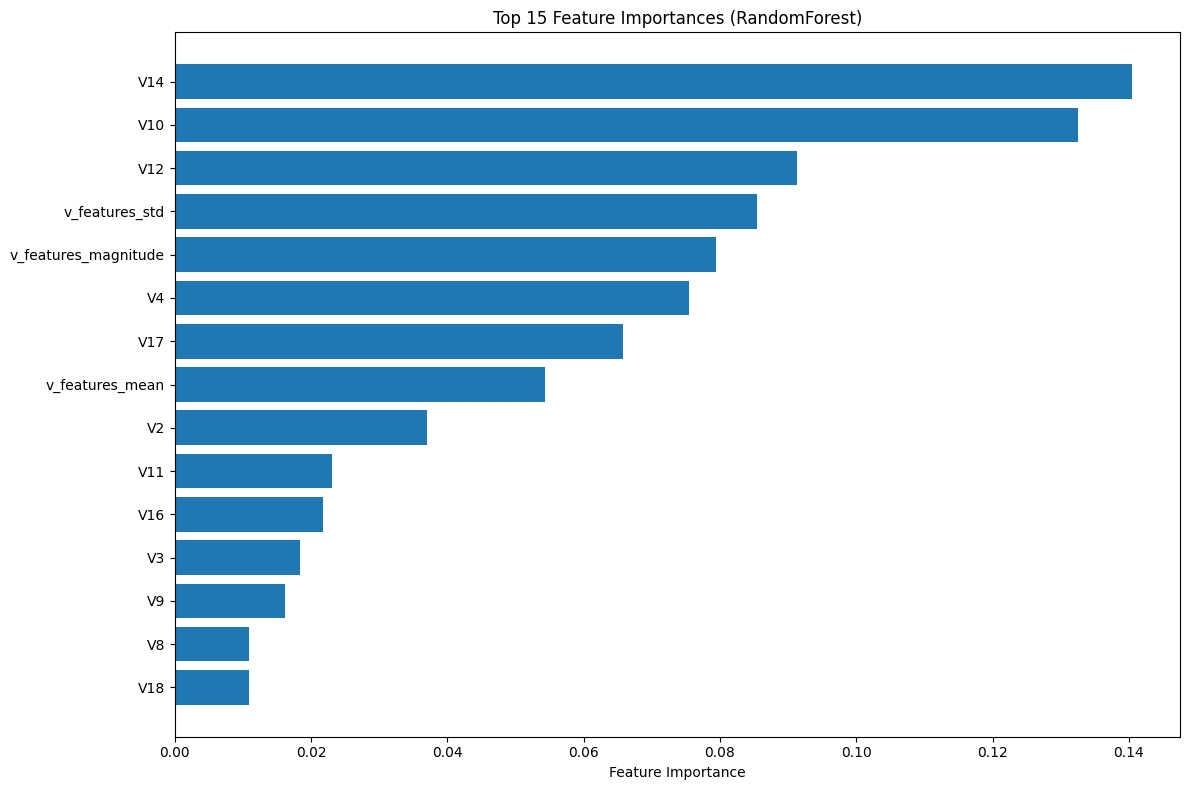

In [ ]:
# Feature importance analysis (RandomForest)
print("\n=== Feature Importance Analysis ===")
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importances (RandomForest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

We determined which anonymized features had the most impact on the random forest model. `V14` , `V10`, and `V12` were the most impactful on the model.

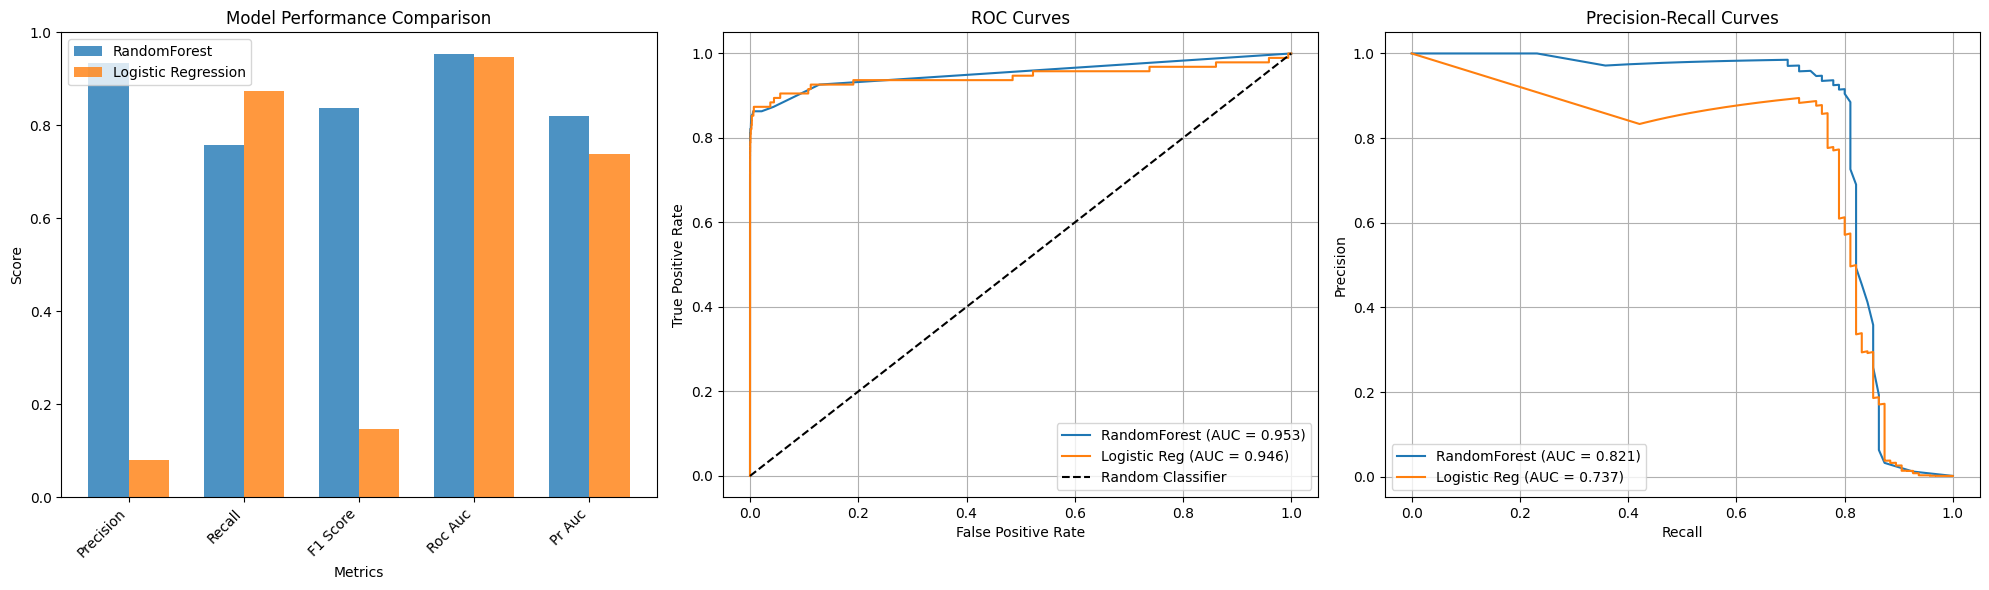

In [ ]:
# Model comparison visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Metrics comparison
models = ['RandomForest', 'Logistic Regression']
metrics = ['precision', 'recall', 'f1_score', 'roc_auc', 'pr_auc']
results = [rf_results, lr_results]

x = np.arange(len(metrics))
width = 0.35

for i, (model, result) in enumerate(zip(models, results)):
    values = [result[metric] for metric in metrics]
    axes[0].bar(x + i*width, values, width, label=model, alpha=0.8)

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x + width/2)
axes[0].set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim(0, 1)

# ROC Curves
from sklearn.metrics import roc_curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba)

axes[1].plot(rf_fpr, rf_tpr, label=f'RandomForest (AUC = {rf_results["roc_auc"]:.3f})')
axes[1].plot(lr_fpr, lr_tpr, label=f'Logistic Reg (AUC = {lr_results["roc_auc"]:.3f})')
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves')
axes[1].legend()
axes[1].grid(True)

# Precision-Recall Curves
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_proba)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_proba)

axes[2].plot(rf_recall, rf_precision, label=f'RandomForest (AUC = {rf_results["pr_auc"]:.3f})')
axes[2].plot(lr_recall, lr_precision, label=f'Logistic Reg (AUC = {lr_results["pr_auc"]:.3f})')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curves')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

Finally we visualized the evaluation of the two models across different metrics and compared their performance.

Random Forest massively outperformed Logistic Regression in Precision and F1 Score. This means that in detectiong fraud, Random Forest is far much more effective in detecting true positives and in detecting fraudulent transactions.

Logistic regression is marginally better, in marking a transaction as not fraudulent while it is.

The ROC Curves show us the tradeoff between the models finding true positives and getting snagged by false positives. In our graph the Random Forest shows superiority.

The Precision-Recall Curves show us how the tradeoff in general performance of the two curves. Here, Random Forest reigns supreme.

-----

8.  Model Optimization and Reporting

<!-- end list -->

In [ ]:
# Hyperparameter tuning for RandomForest
print("Performing hyperparameter optimization for RandomForest...")

# Define a more refined parameter grid for RandomForest
# This grid is a bit smaller and more focused to find a good balance
# `n_estimators`: number of trees in the forest
# `max_depth`: max depth of each tree
# `min_samples_split`: min number of samples required to split an internal node
# `min_samples_leaf`: min number of samples required to be at a leaf node
# `class_weight`: this is crucial for imbalanced data. 'balanced' automatically adjusts weights inversely proportional to class frequencies.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Use F1 score as our primary metric (balances precision and recall)
f1_scorer = make_scorer(f1_score)

# Stratified K-Fold for robust validation
# We use stratified cross-validation to ensure each fold has a similar proportion of fraudulent samples.
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

print("Grid search parameters:", param_grid)
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=cv,
    scoring=f1_scorer,
    n_jobs=-1,
    verbose=1
)

# Note: We fit on the training data, but without SMOTE's generated samples in this optimized grid search
# to let `class_weight` handle the imbalance internally. This is often a more robust approach.
grid_search.fit(X_train, y_train)

print(f"\n Best parameters: {grid_search.best_params_}")
print(f" Best cross-validation F1 score: {grid_search.best_score_:.4f}")

Performing hyperparameter optimization for RandomForest...
Grid search parameters: {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'class_weight': ['balanced']}
Fitting 3 folds for each of 16 candidates, totalling 48 fits

 Best parameters: {'class_weight': 'balanced', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
 Best cross-validation F1 score: 0.8464


Since Random Forest is clearly superior, we conduct hyperparameter tuning and cross-validation to imporove the model's performance.

In [56]:
# Evaluate optimized model
optimized_rf = grid_search.best_estimator_
optimized_pred = optimized_rf.predict(X_test)
optimized_proba = optimized_rf.predict_proba(X_test)[:, 1]

optimized_results = evaluate_model(y_test, optimized_pred, optimized_proba, "Optimized RandomForest")


=== Optimized RandomForest Results ===
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.96      0.74      0.83        95

    accuracy                           1.00     56746
   macro avg       0.98      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC: 0.9395
PR AUC: 0.8260
Confusion Matrix:
[[56648     3]
 [   25    70]]
True Negatives: 56648, False Positives: 3
False Negatives: 25, True Positives: 70


We then evaluate our optimized model

In [57]:
# Final comparison: Baseline vs Optimized
print("\n=== FINAL PERFORMANCE COMPARISON ===")
print(f"Baseline RandomForest F1-Score: {rf_results['f1_score']:.4f}")
print(f"Optimized RandomForest F1-Score: {optimized_results['f1_score']:.4f}")
print(f"Improvement: {optimized_results['f1_score'] - rf_results['f1_score']:.4f}")

print(f"\nBaseline RandomForest Precision: {rf_results['precision']:.4f}")
print(f"Optimized RandomForest Precision: {optimized_results['precision']:.4f}")
print(f"Improvement: {optimized_results['precision'] - rf_results['precision']:.4f}")

print(f"\nBaseline RandomForest Recall: {rf_results['recall']:.4f}")
print(f"Optimized RandomForest Recall: {optimized_results['recall']:.4f}")
print(f"Improvement: {optimized_results['recall'] - rf_results['recall']:.4f}")


=== FINAL PERFORMANCE COMPARISON ===
Baseline RandomForest F1-Score: 0.8372
Optimized RandomForest F1-Score: 0.8333
Improvement: -0.0039

Baseline RandomForest Precision: 0.9351
Optimized RandomForest Precision: 0.9589
Improvement: 0.0238

Baseline RandomForest Recall: 0.7579
Optimized RandomForest Recall: 0.7368
Improvement: -0.0211
